# VISUALIZACIÓN
---

In [1]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
plt.rcParams["figure.figsize"] = (10,8)
warnings.filterwarnings("ignore")

*NOTA*: las gráficas no varían en función del csv utilizado.

In [2]:
df = pd.read_csv("datos/02-bikes_sinoutliers.csv", index_col= 0).reset_index(drop= True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,670
2,winter,0,3,0,4,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,spring,0,4,0,7,0,1,8.200000,10.60610,59.0435,10.739832,1454
4,spring,0,5,0,2,1,1,9.305237,11.46350,43.6957,12.522300,1518


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      716 non-null    object 
 1   yr          716 non-null    int64  
 2   mnth        716 non-null    int64  
 3   holiday     716 non-null    int64  
 4   weekday     716 non-null    int64  
 5   workingday  716 non-null    int64  
 6   weathersit  716 non-null    int64  
 7   temp        716 non-null    float64
 8   atemp       716 non-null    float64
 9   hum         716 non-null    float64
 10  windspeed   716 non-null    float64
 11  registered  716 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 67.2+ KB


In [4]:
# Volvemos a cambiar a category algunas columnas ya que se modifican al guardar y cargar
df[["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]] = df[["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]].astype("category")

### Distribución variable *Registered*

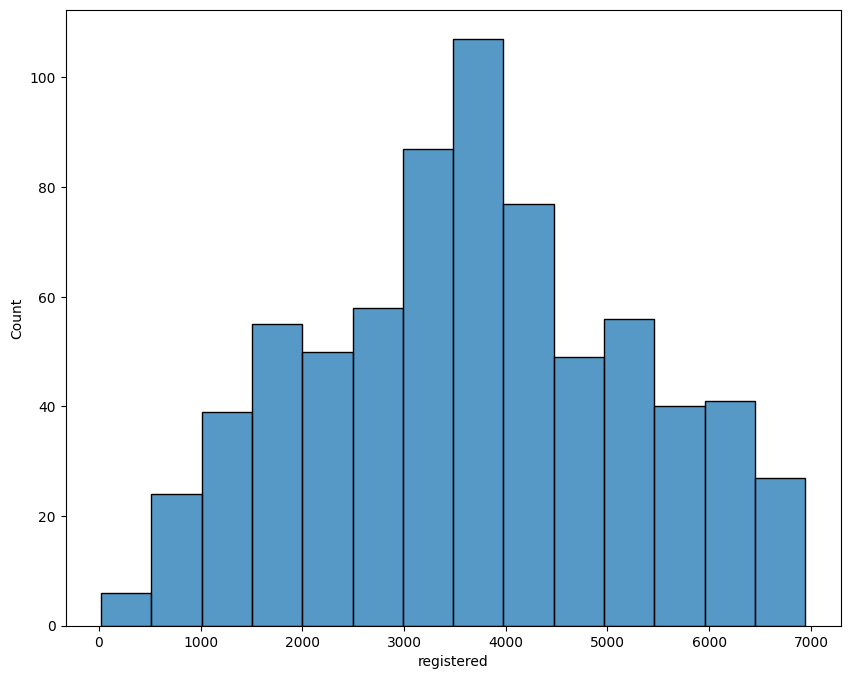

In [5]:
sns.histplot(data = df, x = "registered");

### Correlación

In [6]:
masc = np.triu(np.ones_like(df.corr(), dtype=np.bool_))

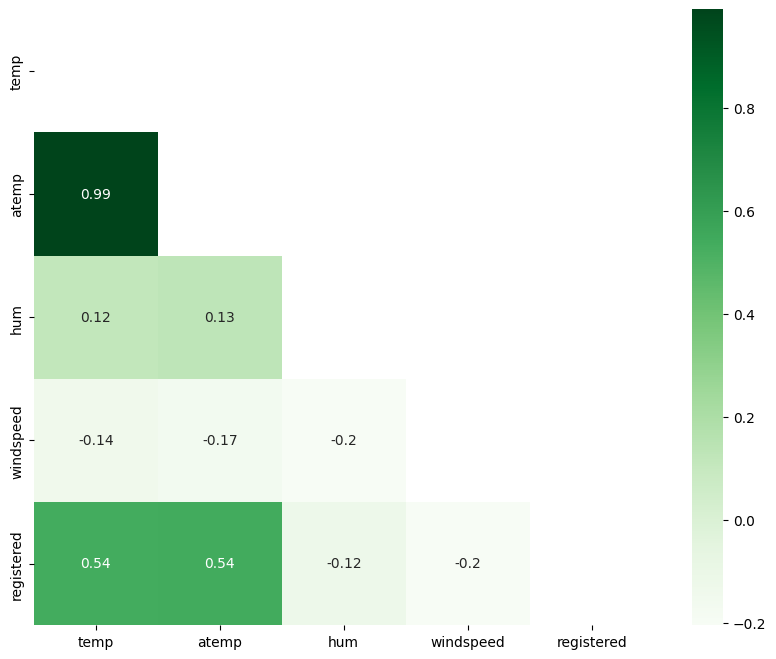

In [46]:
sns.heatmap(df.corr(), mask= masc, annot= True, cmap= "Greens")
plt.savefig("datos/corr.png");

Podemos observar que se puede eliminar la columna temp o atemp, una de las 2

### Variables numéricas

In [26]:
# Hacemos una lista con las columnas que queremos comparar con la columna "registered"
lista_columnas = [ "atemp", "hum", "windspeed"]

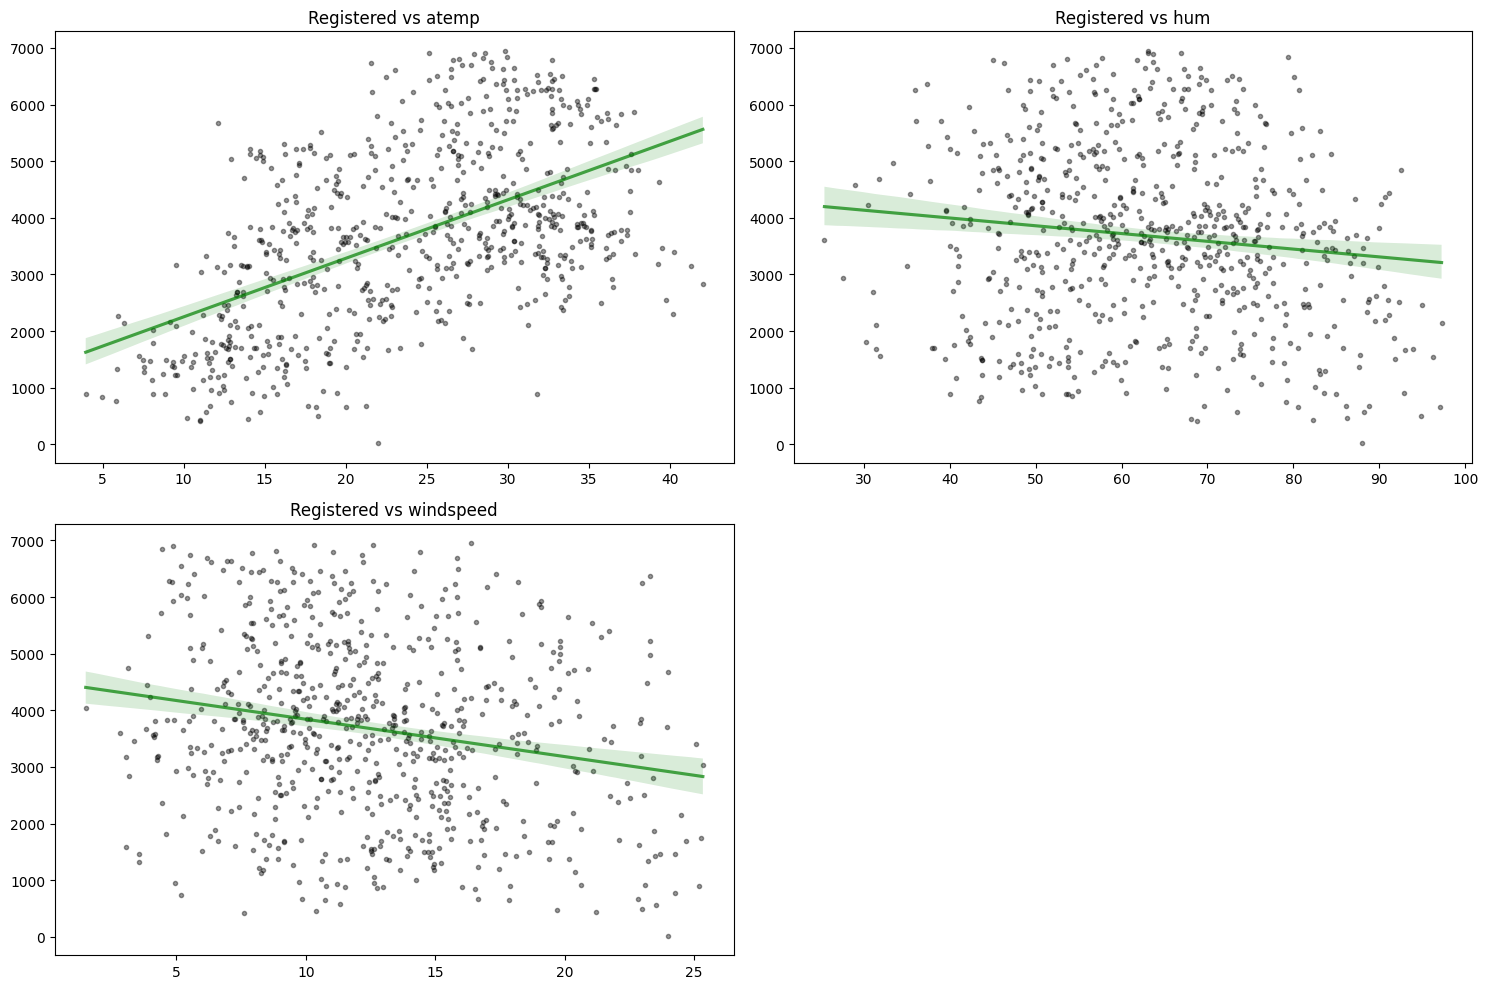

In [31]:
# Hacemos un regplot para compararlas con registered
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
axes = axes.flat

for i, colum in enumerate(lista_columnas):
    sns.regplot(
        x = df[colum],
        y = df["registered"],
        color = "black",
        marker = ".",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "green", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Registered vs {colum}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.delaxes(axes[-1])
fig.tight_layout()
plt.savefig("datos/weather.png");

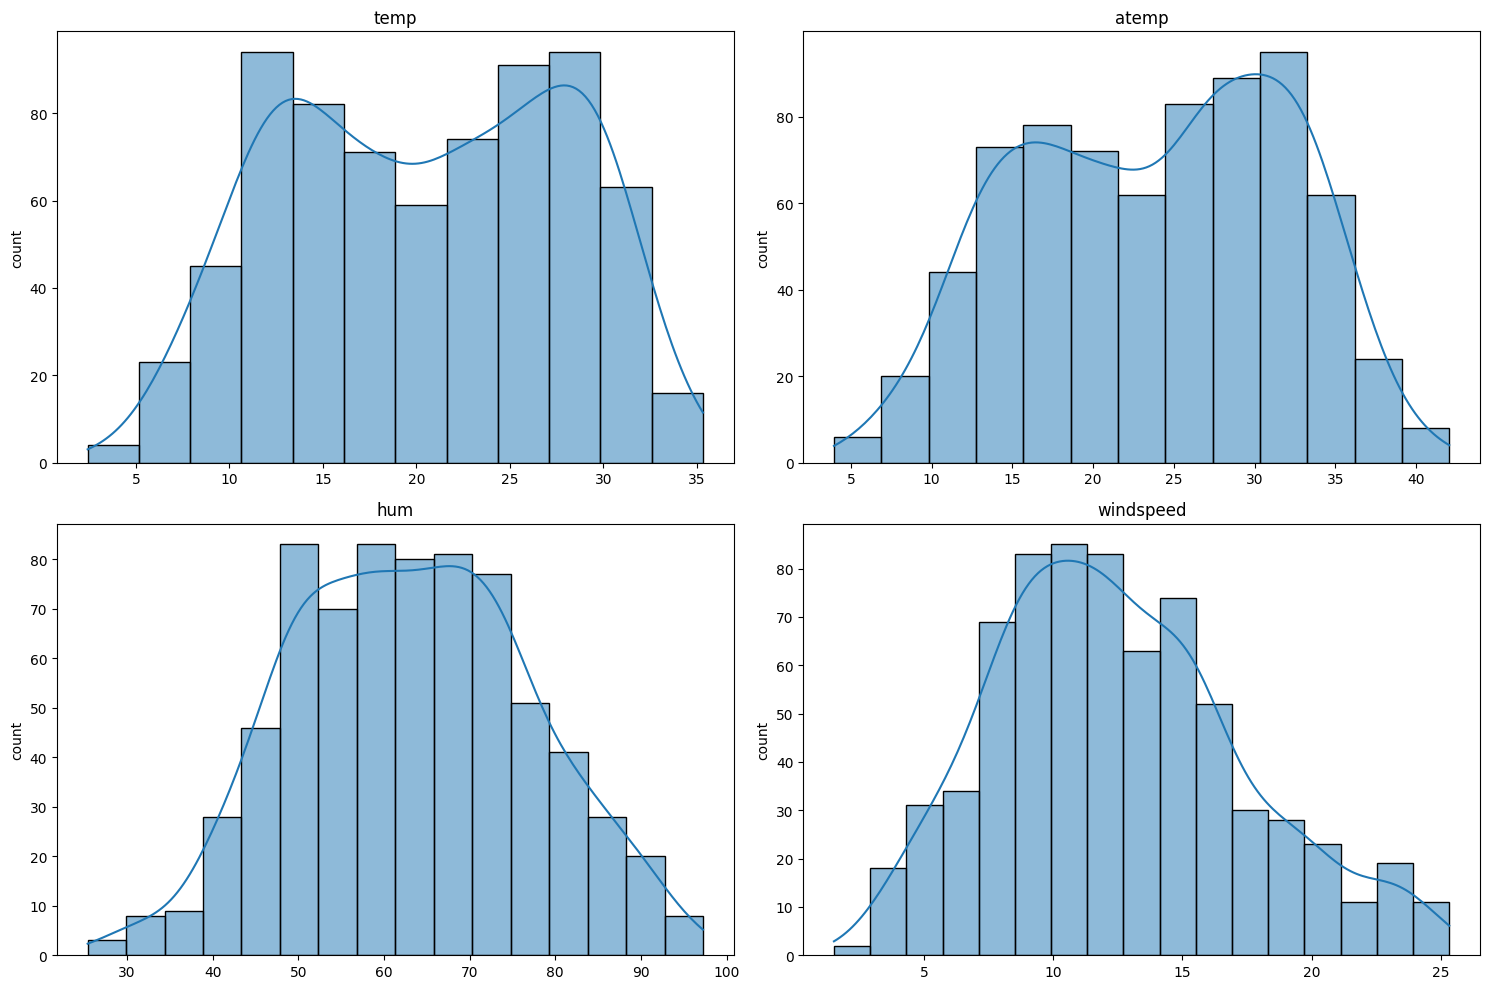

In [10]:
#Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

axes = axes.flat

for i, colum in enumerate(lista_columnas): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True,
        ax = axes[i])
    
    axes[i].set_title(colum)
    axes[i].tick_params()
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count")

fig.tight_layout();

### Variables categóricas

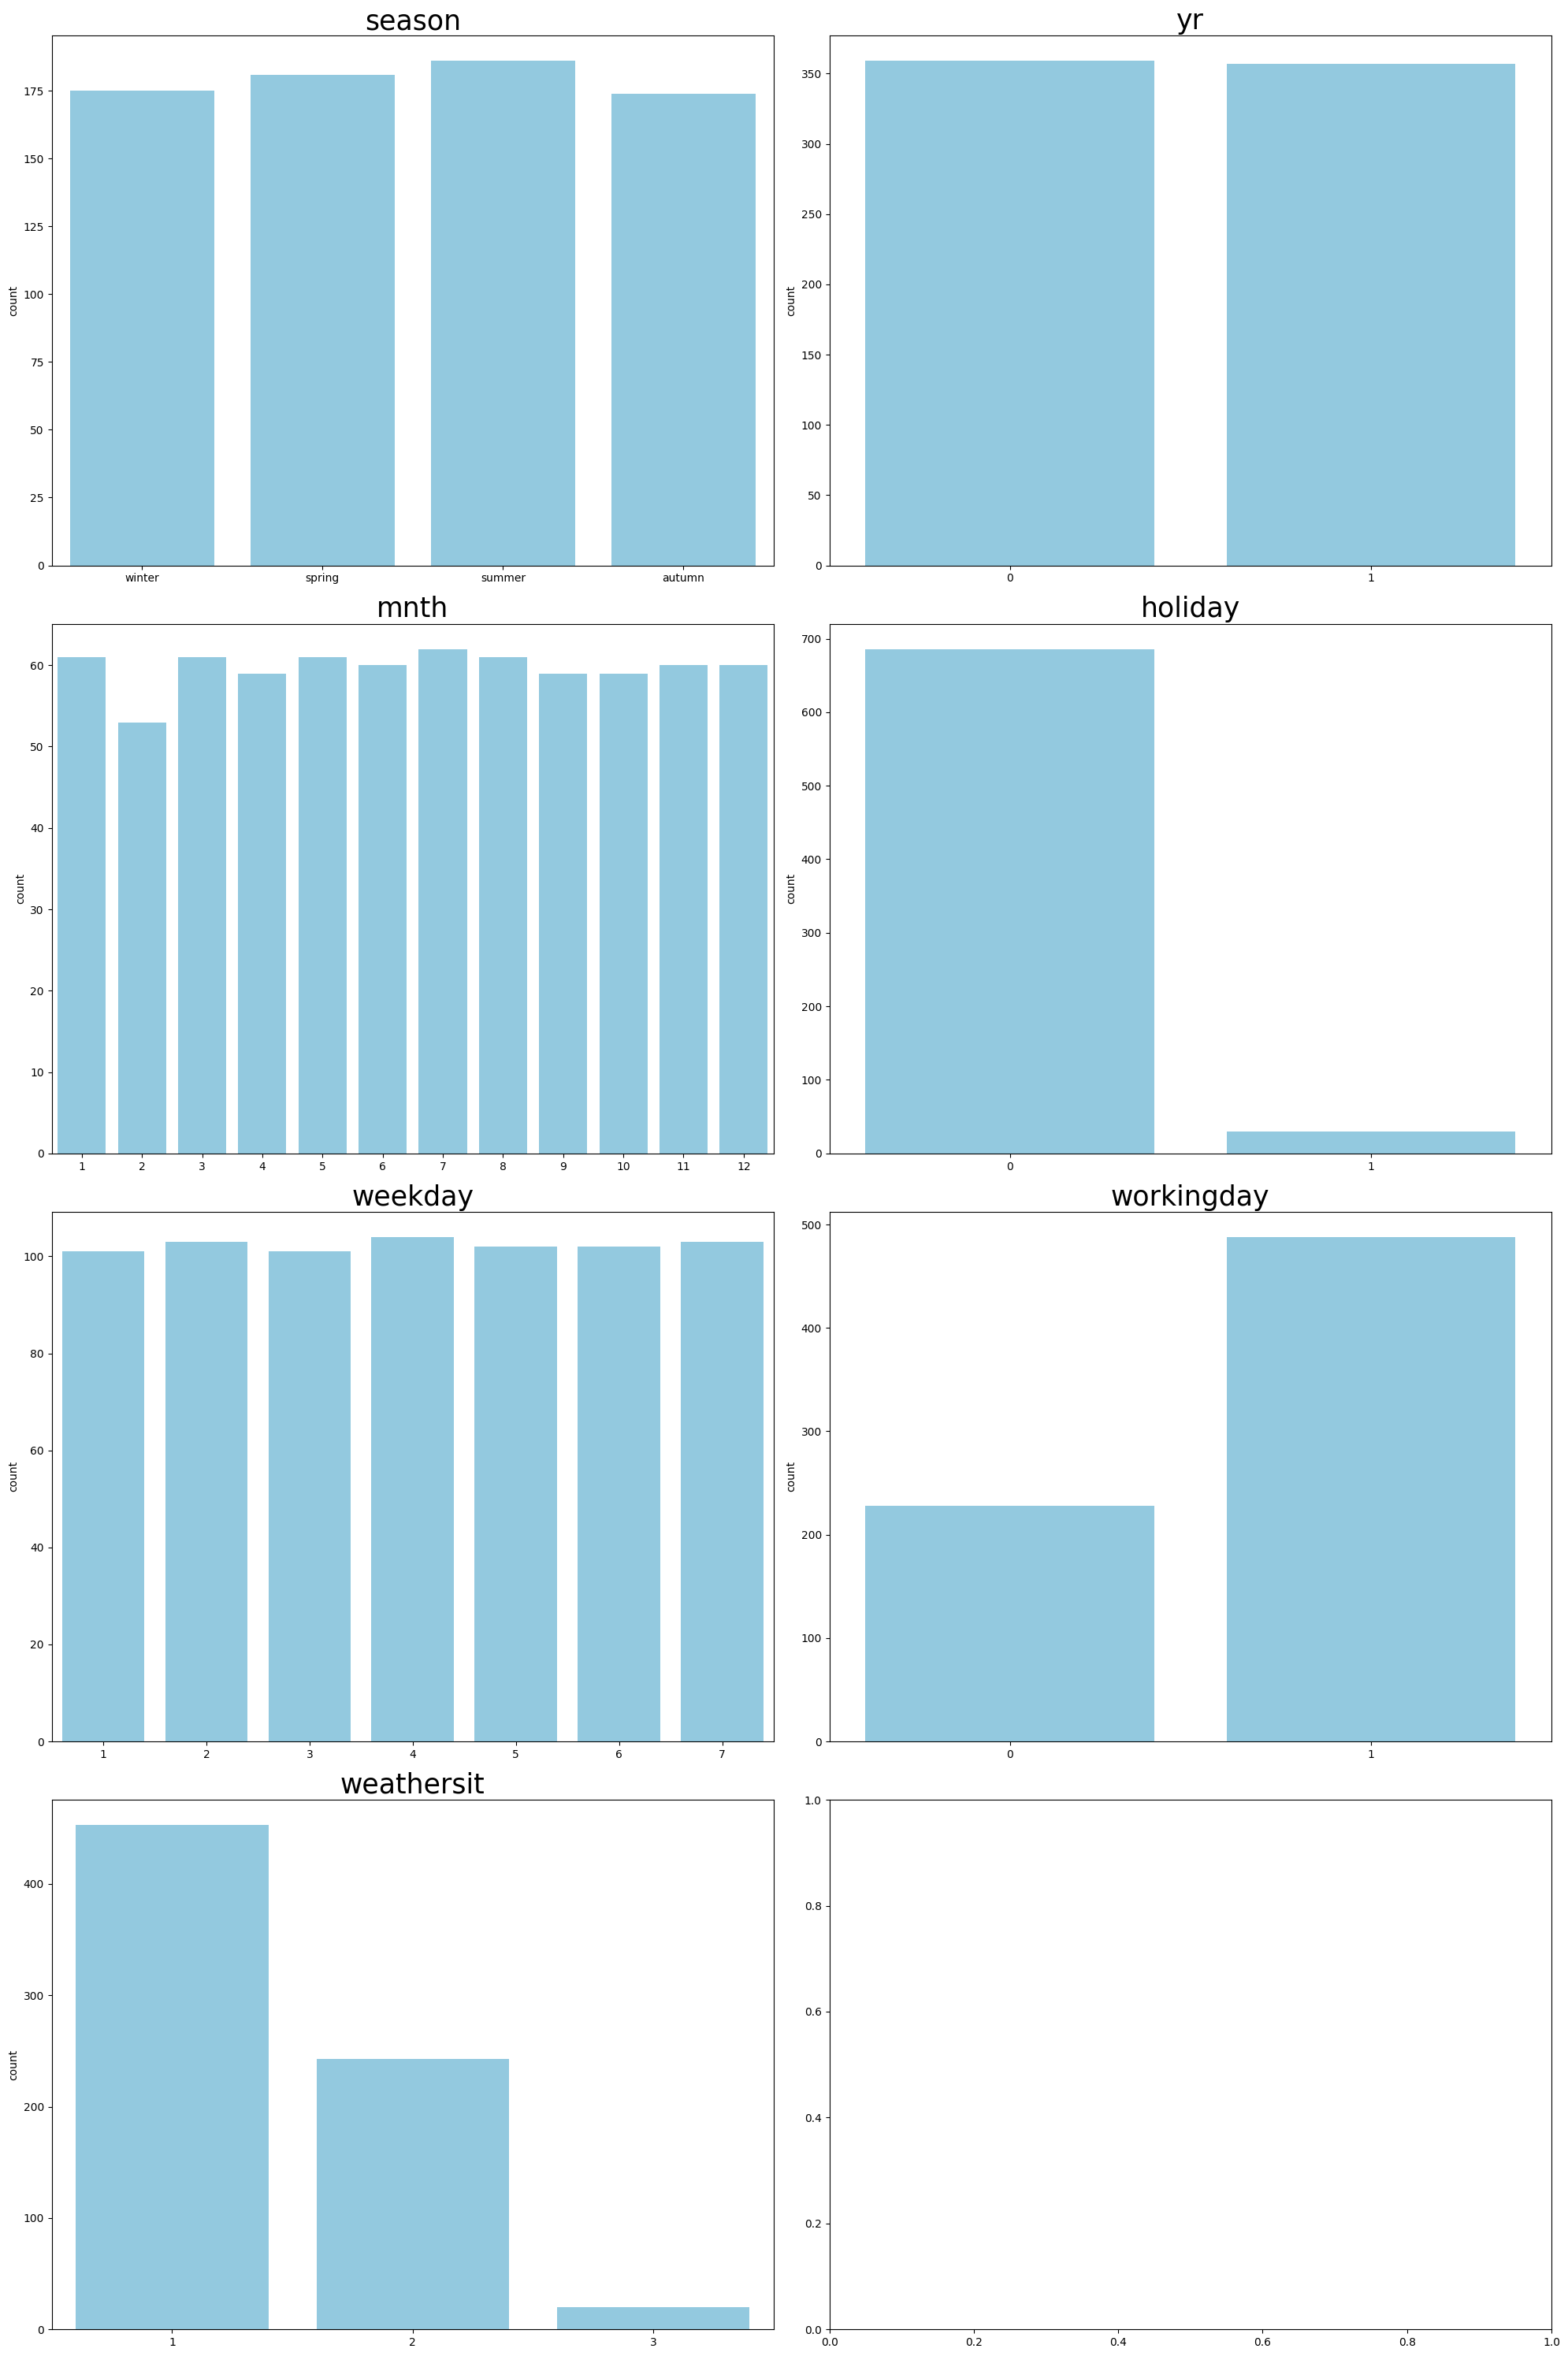

In [11]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 30))

axes = axes.flat

columnas_cat = df.select_dtypes(include =['category','object']).columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        color = "skyblue",
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25)
    axes[i].tick_params()
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count")

fig.tight_layout();

### Variables categóricas con **registered**

In [12]:
df_hol = df.groupby("holiday").sum().reset_index()

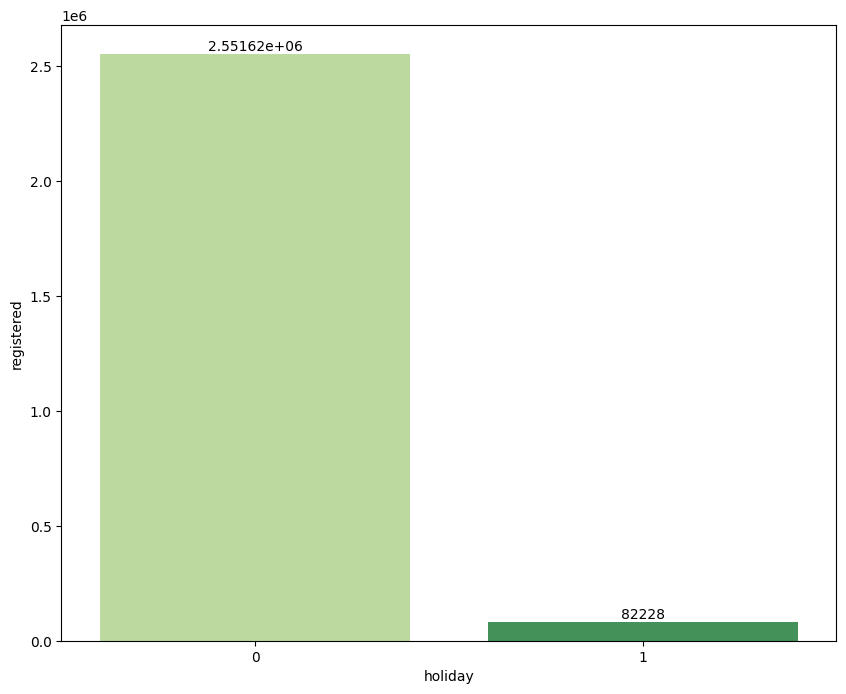

In [24]:
ax = sns.barplot(x= "holiday", y = "registered", data = df_hol, errwidth=0, palette= "YlGn")
ax.bar_label(ax.containers[0])
plt.savefig("datos/holiday-re.png")

In [14]:
df.groupby("holiday")["registered"].sum()

holiday
0    2551623
1      82228
Name: registered, dtype: int64

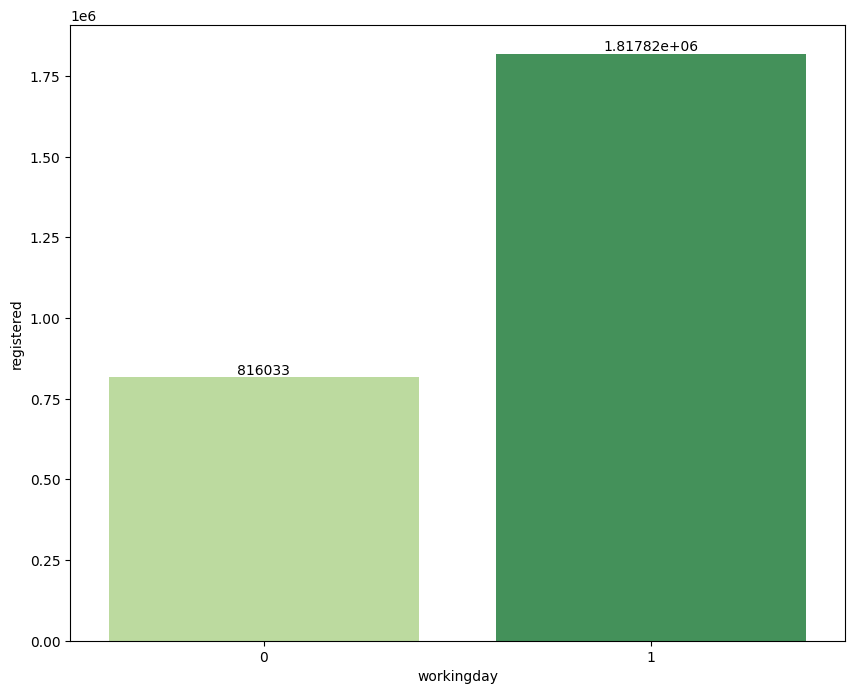

In [18]:
df_work = df.groupby("workingday").sum().reset_index()
ax = sns.barplot(x= "workingday", y = "registered", data = df_work, errwidth=0, palette= "YlGn")
ax.bar_label(ax.containers[0])
plt.savefig("datos/workingday-re.png")

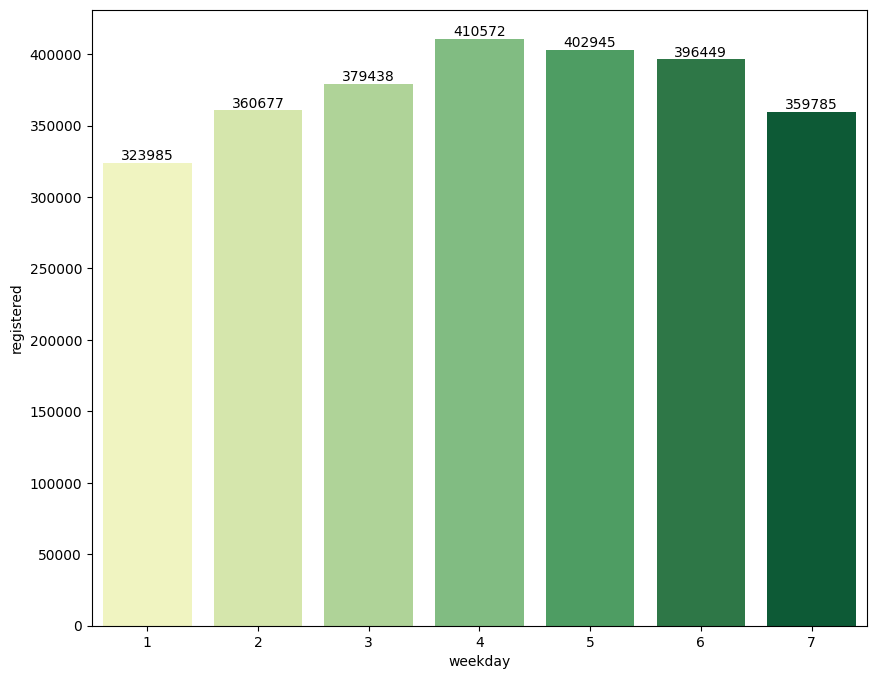

In [19]:
df_week = df.groupby("weekday").sum().reset_index()
ax = sns.barplot(x= "weekday", y = "registered", data = df_week, errwidth=0, palette= "YlGn")
ax.bar_label(ax.containers[0])
plt.savefig("datos/weekdayday-re.png")

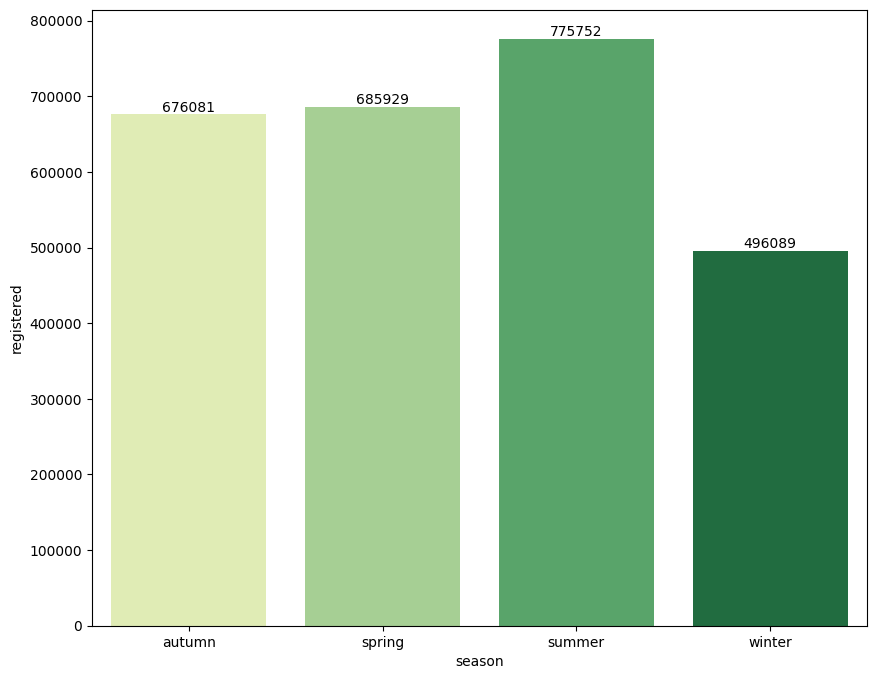

In [20]:
df_season = df.groupby("season").sum().reset_index()
ax = sns.barplot(x= "season", y = "registered", data = df_season, errwidth=0, palette= "YlGn")
ax.bar_label(ax.containers[0])
plt.savefig("datos/season-re.png")

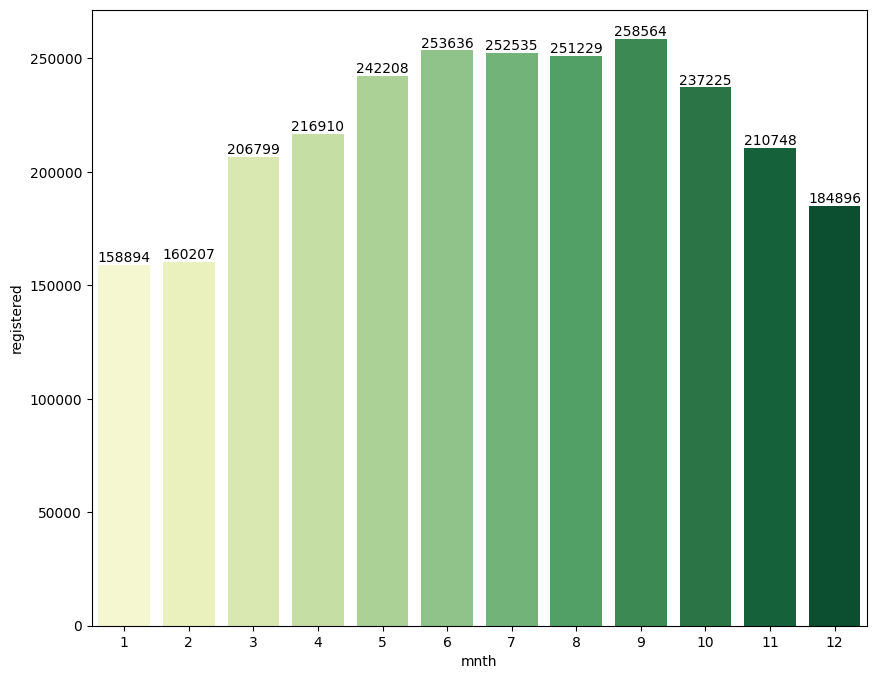

In [21]:
df_month = df.groupby("mnth").sum().reset_index()
ax = sns.barplot(x= "mnth", y = "registered", data = df_month, errwidth=0, palette= "YlGn")
ax.bar_label(ax.containers[0])
plt.savefig("datos/month-re.png")

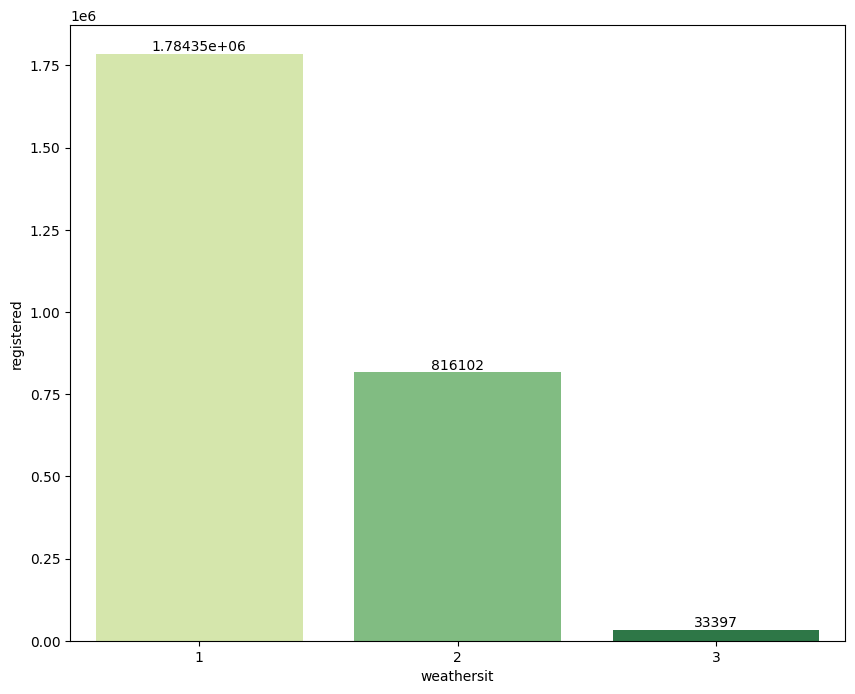

In [22]:
df_weather = df.groupby("weathersit").sum().reset_index()
ax = sns.barplot(x= "weathersit", y = "registered", data = df_weather, errwidth=0, palette= "YlGn")
ax.bar_label(ax.containers[0])
plt.savefig("datos/weathersit-re.png")

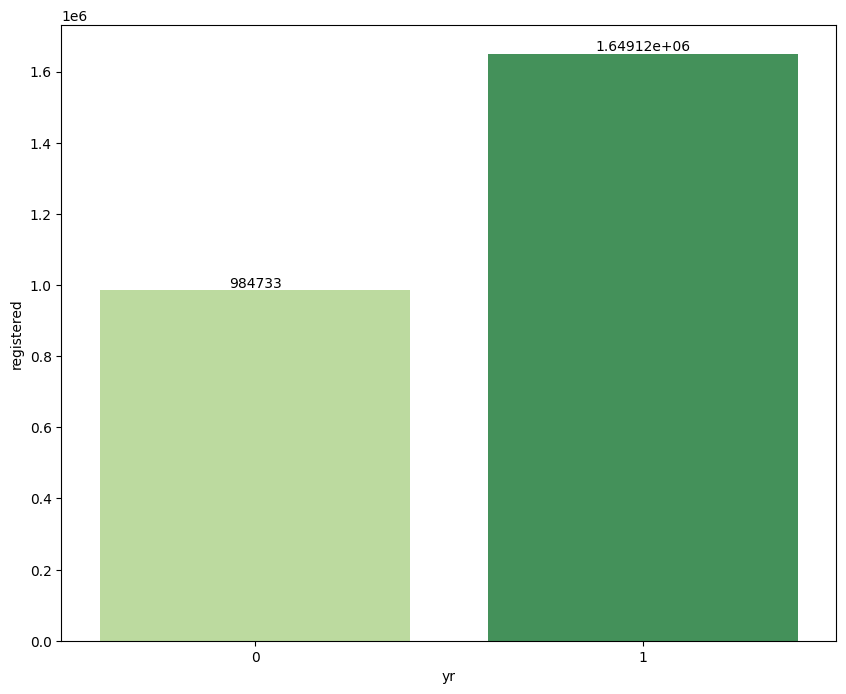

In [23]:
df_yr = df.groupby("yr").sum().reset_index()
ax = sns.barplot(x= "yr", y = "registered", data = df_yr, errwidth=0, palette= "YlGn")
ax.bar_label(ax.containers[0])
plt.savefig("datos/year-re.png")

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,670
2,winter,0,3,0,4,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,spring,0,4,0,7,0,1,8.200000,10.60610,59.0435,10.739832,1454
4,spring,0,5,0,2,1,1,9.305237,11.46350,43.6957,12.522300,1518


Eliminamos las columnas **dteday**, porque lo que nos aporta se refleja en otras columnas, **temp**, porque su información es redundante con *atemp*, y **cnt** y **casual** porque hemos decidido quedarnos con *registered*

In [ ]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,670
